In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [151]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no missing value, it is already safe

In [153]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Age column, we can see it ranges from 18-70 years old. 
Annual Income, ranges from 15k to 137k.
And Spending Score , ranges from 1-99.

We can see the data has huge ranges so , for column age, annual income, and spending score needs scaling.

In [154]:
# rename the Annual Income($) column so it is easier
df = df.rename(columns={"Annual Income (k$)": "Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending"})
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


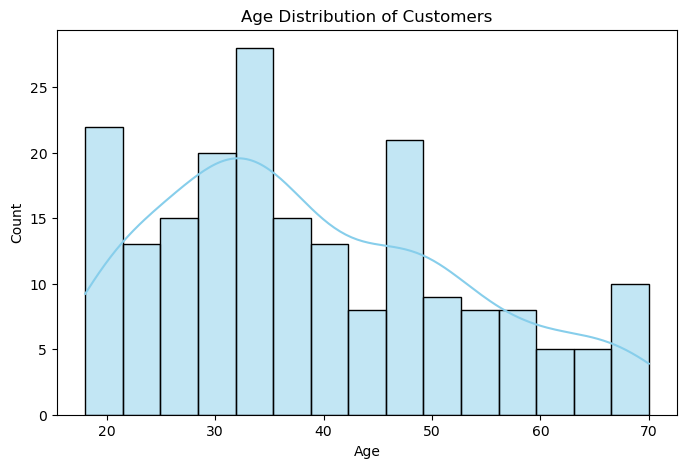

In [177]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

From the chart we can see that most customers are from 30-50, years old, significantly age 35 + and least of our customers are starting from age 50 aboce

C:\Users\celin\AppData\Local\Temp\ipykernel_16772\1999119625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=['pink','blue'])


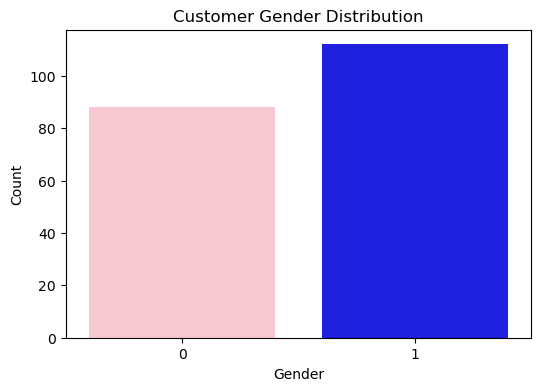

In [182]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette=['pink','blue'])
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

We can see that most of our customers are Male , but the differences is isnt significant.

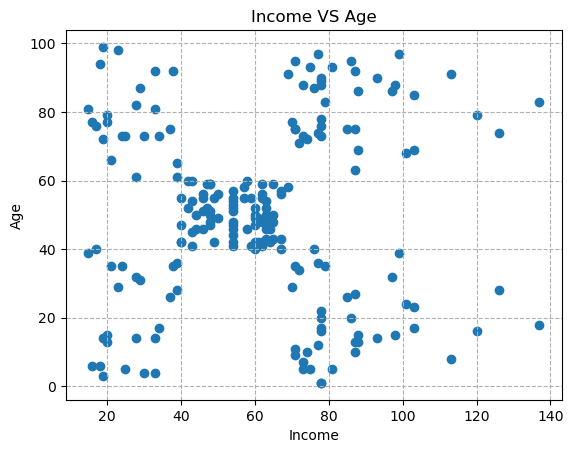

In [156]:
plt.scatter(df['Income'], df['Spending'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plot shows that there is no clear correlation between income and age, as the points are widely scattered across the graph. 

However, there is a cluster of individuals aged 40–60 with incomes between 40–70, suggesting that many people fall within this middle-age and middle-income range. Overall, income levels vary greatly across all ages, indicating that age does not strongly determine income in this dataset.

Encoding Gender

In [158]:
gender_map = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(gender_map)

df_original = df.copy()

In [159]:
# create new dataframe that consist only age, annual income and spending score
df_numeric = df_original[['Age', 'Income', 'Spending']]
df_numeric.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Scaling

Data is needed to scaled ,because if not features with larger numerical values (like income) will dominate over smaller ones (like age), causing the algorithm to treat them as more important. 

Scaling ensures that all features are on the same scale, so each contributes equally to the distance calculations used in clustering.

In [160]:
from sklearn.cluster import KMeans

In [161]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=["Age", "Income", "Spending"])

df_minmax_scaled['Gender'] = df_original['Gender'].values

df_minmax_scaled.head()

,Age,Income,Spending,Gender
0,0.019231,0.000000,0.387755,0
1,0.057692,0.000000,0.816327,0
2,0.038462,0.008197,0.051020,1
3,0.096154,0.008197,0.775510,1
4,0.250000,0.016393,0.397959,1


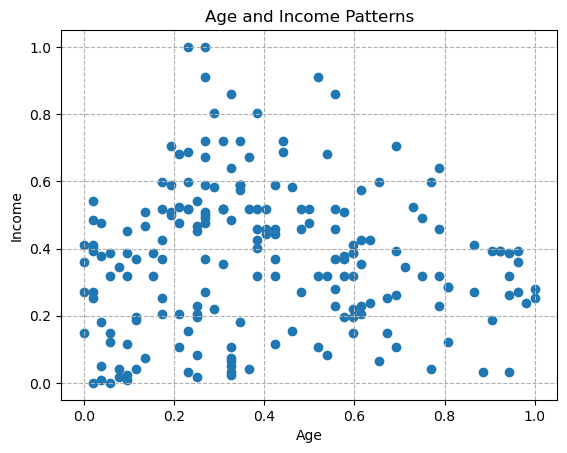

In [162]:
# visualization
plt.scatter(df_minmax_scaled["Age"], df_minmax_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

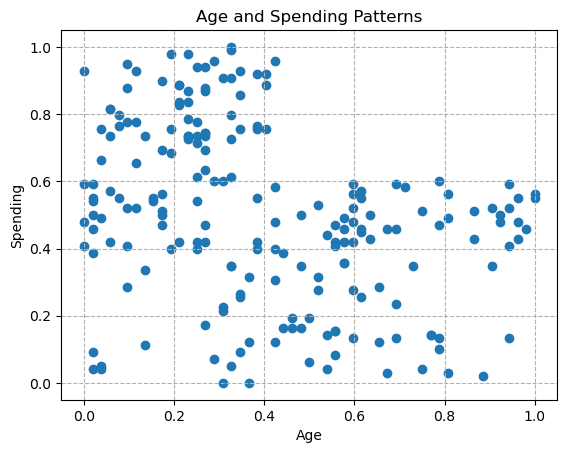

In [163]:
plt.scatter(df_minmax_scaled["Age"], df_minmax_scaled["Spending"])
plt.xlabel("Age")
plt.ylabel("Spending")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Spending Patterns")
plt.show()

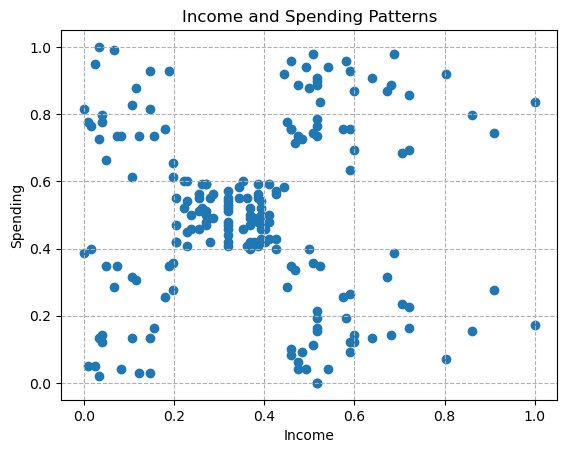

In [164]:
plt.scatter(df_minmax_scaled["Income"], df_minmax_scaled["Spending"])
plt.xlabel("Income")
plt.ylabel("Spending")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Spending Patterns")
plt.show()

## Part C: Choosing K

In [165]:
from sklearn.cluster import KMeans

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

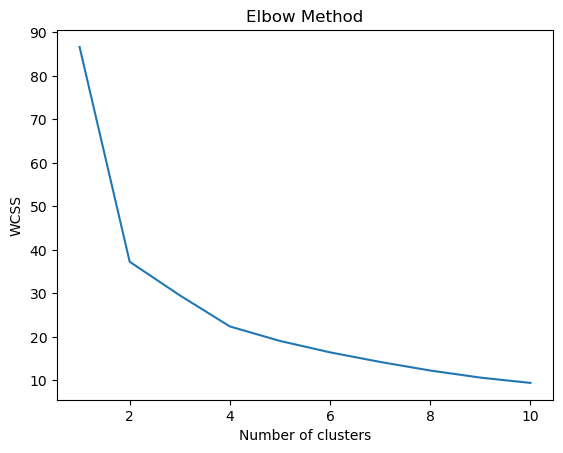

In [166]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the chart, we can see the that the WCSS value has a significant drop during the number of clusters 1-3, but starting 4, it the WCSS value starts to get steady and stable

In [167]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  86.681482
1                   2  37.272272
2                   3  29.552858
3                   4  22.390960
4                   5  19.060907
5                   6  16.434553
6                   7  14.229306
7                   8  12.253159
8                   9  10.625832
9                  10   9.403891


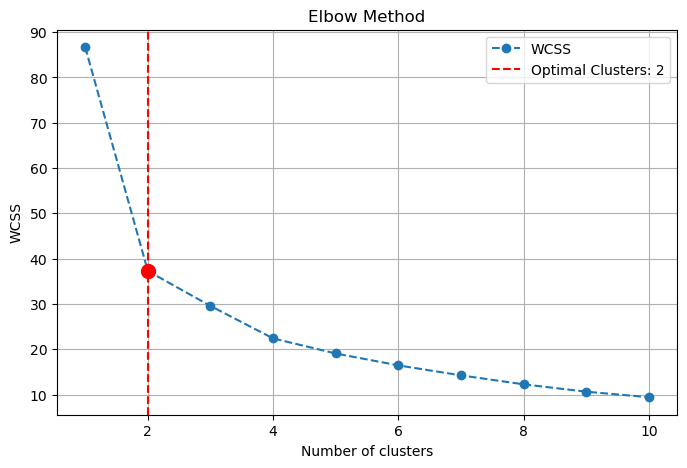

The optimal number of clusters is: 2


In [168]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

From the Elbow Method chart, this means that the best number of clusters for this data is 4. Because the WCSS value is starts to get stable starting when k=4.

## Part D: Modeling with K-Means

In [169]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

c:\Users\celin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Income,Spending,KMeans_Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,1
3,4,1,23,16,77,3
4,5,1,31,17,40,3


C:\Users\celin\AppData\Local\Temp\ipykernel_16772\2490758909.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


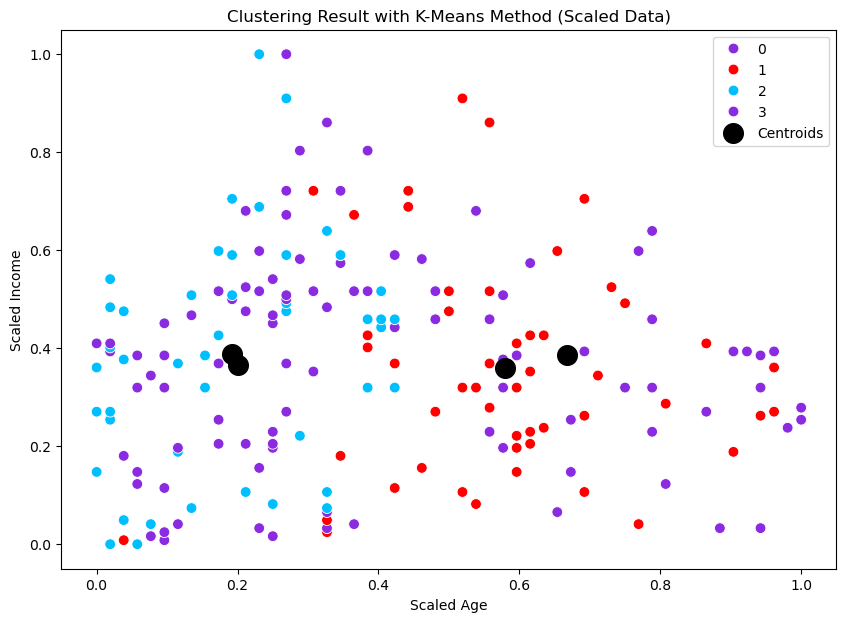

In [170]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

C:\Users\celin\AppData\Local\Temp\ipykernel_16772\79043913.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Spending", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


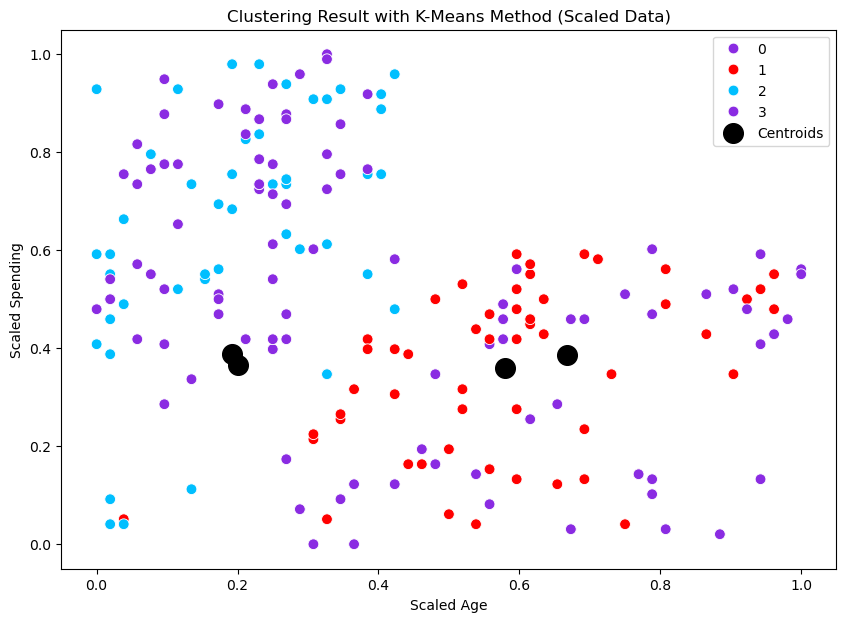

In [171]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Spending", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

C:\Users\celin\AppData\Local\Temp\ipykernel_16772\195775782.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Income", y = "Spending", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)


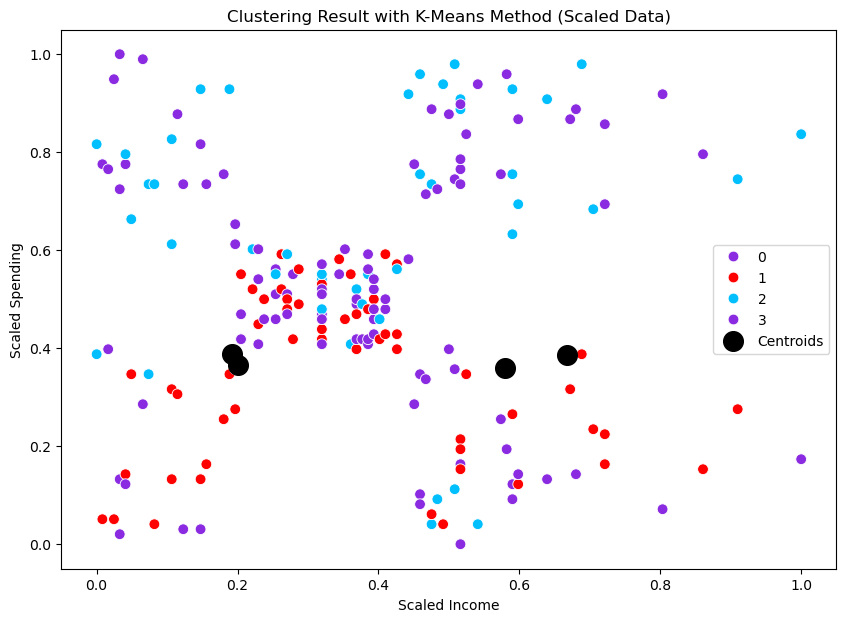

In [172]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

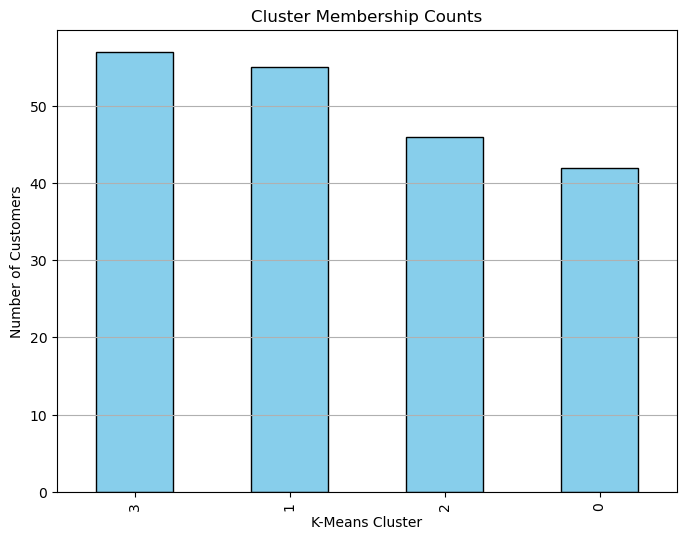

In [173]:
# brp anggota di cluster
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [176]:
# Assign cluster labels (from KMeans) to the original dataframe
df['Cluster'] = clusters

# Group by cluster and calculate descriptive statistics (using original values)
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Spending': ['mean', 'min', 'max'],
    'Gender': ['count', 'mean']
})

# Rename index for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Display the result
cluster_summary

Age             Income            Spending          \
                     mean min max       mean min  max       mean min max   
KMeans_Cluster                                                             
0               52.738095  32  70  62.214286  19  137  30.642857   1  60   
1               48.109091  20  68  58.818182  16  126  34.781818   5  59   
2               28.000000  18  40  62.239130  15  137  64.826087   5  97   
3               28.438596  18  40  59.666667  16  120  67.684211  29  99   

               Gender       
                count mean  
KMeans_Cluster              
0                  42  0.0  
1                  55  1.0  
2                  46  0.0  
3                  57  1.0

Cluster 0 = Older / Low-Spending Consumers

Profile:

Age around 53 years old (mostly 32–70).
Moderate income (~$62K average).
Low spending (~$31K average).
Predominantly female (0 = female).

Implications:
Focus on budget-friendly or essential products.
Use traditional marketing channels (email, community outreach) alongside digital channels.
Offer promotions and discounts to encourage higher spending.
Highlight reliability, practicality, and simplicity in messaging.

Cluster 1 = Mature / Moderate-Spending Consumers

Profile:

Age around 48 years old (mostly 20–68).
Moderate income (~$59K average).
Moderate spending (~$35K average).
Predominantly male (1 = male).

Implications:

Offer mid-tier products balancing quality and affordability.
Use digital marketing with informative content highlighting value and benefits.
Introduce loyalty or reward programs to encourage repeat purchases.
Emphasize efficiency, convenience, and professional lifestyle in messaging.

Cluster 2 = Young / High-Spending Consumers

Profile:
Age around 28 years old (mostly 18–40).
Moderate income (~$62K average).
High spending (~$65K average).
Predominantly female (0 = female).

Implications:

Target with trendy, high-value, or aspirational products.
Use social media, influencers, and digital campaigns to engage.
Offer loyalty programs, bundles, and limited editions to maximize engagement.
Highlight lifestyle, personal expression, and exclusivity in messaging.

Cluster 3 = Young / High-Spending Male Consumers

Profile:

Age around 28 years old (mostly 18–40).
Moderate income (~$60K average).
High spending (~$68K average).
Predominantly male (1 = male).

Implications:

Promote premium or high-tech products appealing to young males.
Leverage digital channels, gaming, and influencer marketing.
Offer exclusive experiences or personalization options.
Focus messaging on excitement, trendiness, and social status.